# Group Members
1. Saiful Islam

   Student ID: 10634911
2. Ruhit Ahmed Rizon

   Student ID: 10640049

# Assignment
1. Define, design, and apply Crisp-DM methodology from Business to Decision.
2. Clarify the Business understanding phase in your project.
3. Specify the data preparation tasks and elaborate on their needs in your project.
4. Apply three Machine learning models. Elaborate on the mathematical requirements and explain each model.
5. Evaluate and validate the models using an appropriate measure of performance.
6. Deploy the best model and elaborate on the insights and findings of your project

# Business Understanding

Given that we believe it to be a significant issue in human history, we chose the heart disease dataset. To determine whether a patient has a cardiac disease or not, our doctors formerly had to rely only on their own expertise, knowledge, and methods of diagnosis. But today's technology is so advanced that it can assist medical professionals in diagnosing issues and offering solutions. We believe that if we could develop an accurate model to recognize cardiac illness and transmit the results to the doctor. A final decision on the patient can be made with ease. This will speed up diagnosis and increase the accuracy of the diagnosis of cardiac disease. Let's imagine that in the past, doctors had to thoroughly examine a patient's files to determine whether or not he had heart disease. If so, how severe is it and what will be done about it? All of this took a long time. But today, with the aid of an appropriate machine learning model, they can quickly see the potential outcome. As a result, individuals can quickly and simply make a decision.


# Loading Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec

from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Base Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensemble Classifiers
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from numpy import mean, std

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import plotly.graph_objects as gpo

# Data Understanding

A dataset (heart.csv) has been selected which is based on heart disease. The source of the dataset is: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. In the dataset, it is seen that Age, RestingBP, Cholesterol, FastingBS, MaxHR and Oldpeak columns are numerical. On the other hand Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope columns are non-numerical. Therefore, OneHotEncoder has been applied to non-numeric columns. Now HeartDisease column is the target variable. So it is used as the output variable(y) and rest of the columns are taken as input variable(X).

Dataset

The Heart Diseases dataset are from University of California machine learning repository. The dataset consist of 12 variables and 918 observations. The description of the variables are :

    Age : age of the patient [years]

    Sex : sex of the patient
        M : Male
        F : Female

    ChestPainType : chest pain type
        TA : Typical Angina
        ATA : Atypical Angina
        NAP : Non-Anginal Pain,
        ASY : Asymptonic

    RestingBP : resting blood pressure [mmHg]

    Cholesterol : serum cholesterol [mm/dl]

    FastingBS : fasting blood sugar
        1 : if FastingBS > 120 mg/dl
        0 : otherwise

    RestingECG : esting electrocardiogram results
        Normal : Normal
        ST : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05

    MaxHR : maximum heart rate achived [Numeric value between 60 and 202]

    ExerciseAngina : exercise-induced angina
        Y : Yes
        N : No

    Oldpeak : oldpeak [Numeric value measured in depression]

    ST_Slope : the slope of the peak exercise ST segment
        Up : upsloping
        Flat : flat
        Down : downsloping

    HeartDisease : output class
        1 : heart disease
        0 : normal

# Data loding and Identifying Input and Output

In [ ]:
data = read_csv('heart.csv')
X = data.drop('HeartDisease', axis=1)  # input
y = data['HeartDisease']   # output
print(y.value_counts())
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

print(Counter(y_over))

1    508
0    410
Name: HeartDisease, dtype: int64
Counter({0: 508, 1: 508})


# Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Ploting different graphs for different columns in terms of Heart Disease

Here some columns are demonstarted in different Historgram.

<Figure size 800x550 with 0 Axes>

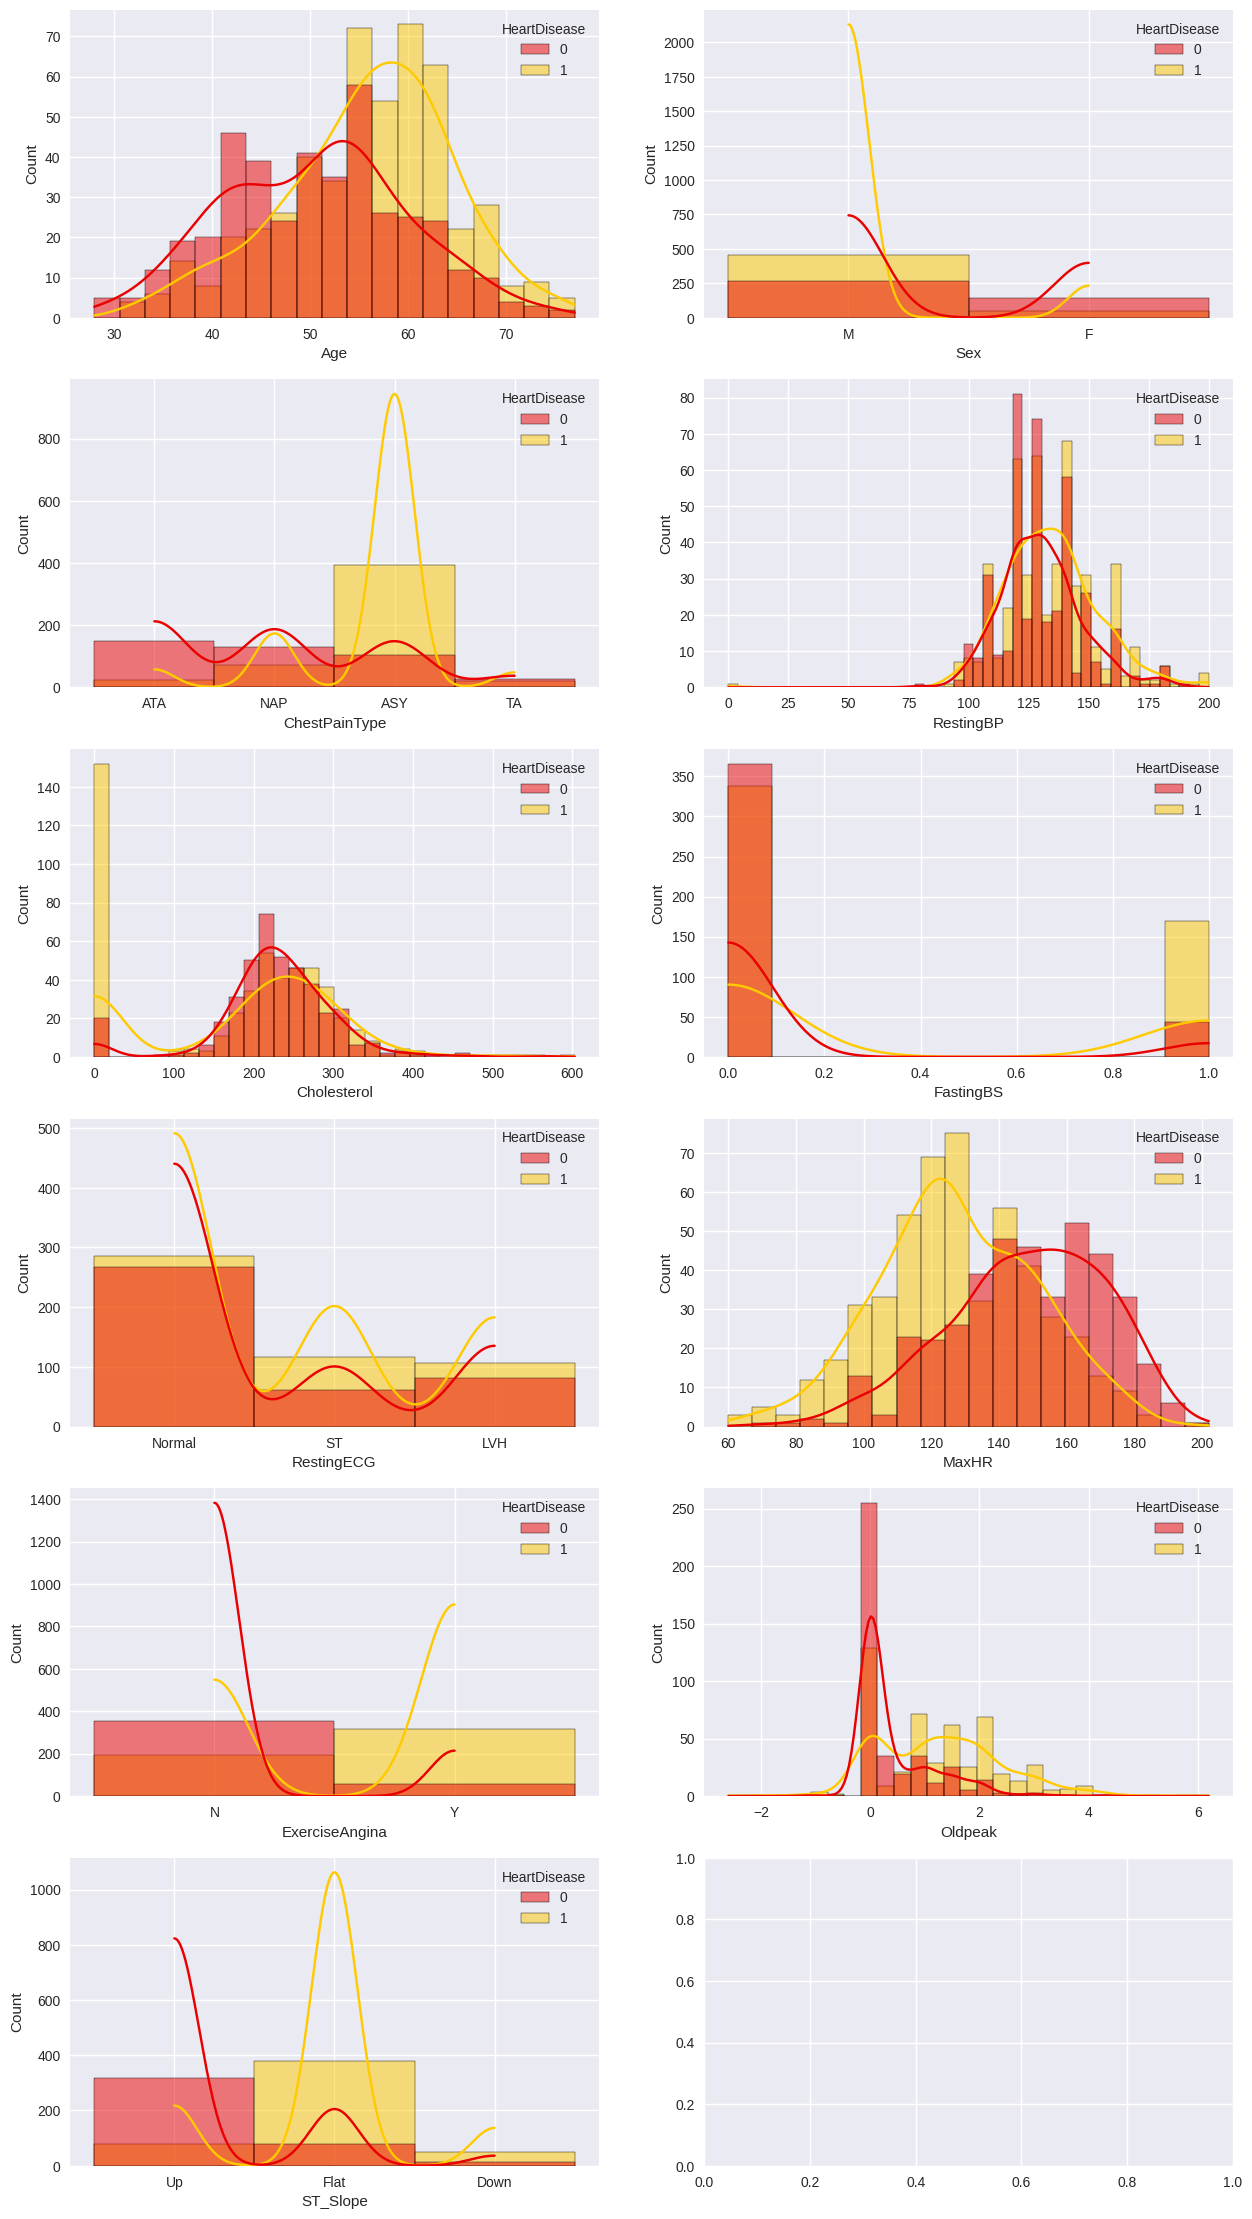

In [ ]:
plt.style.use("seaborn-v0_8")
plt.subplots_adjust(hspace=0.2)
color = 'hot'

fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in data.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=data, x=feature, kde=True, palette=color, hue='HeartDisease')
        i+=1

# Scatter Plot of Age vs MaxHR

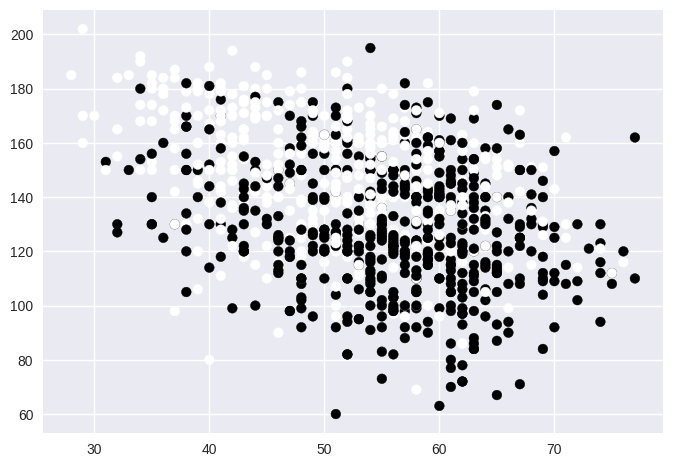

In [ ]:
plt.scatter( data["Age"], data["MaxHR"], c=data["HeartDisease"])

# Pie chart of Heart Disease vs No Heart Disease ratio

In [ ]:
texts = ["Has Heart Disease","No Heart Disease"]
counts = [data[data["HeartDisease"] == 1].count().to_numpy()[0],
         data[data["HeartDisease"] == 0].count().to_numpy()[0]]

fig = gpo.Figure(data=[gpo.Pie(labels=texts,
                             values=counts,
                             marker_colors=['teal' ,' silver'],
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Heart Disease Percentage  According to Dataset', layout_showlegend=False)
fig.show()

# Data Preparation

The original dataset contains 508 1s & 410 0s. Therefore, to achieve a 50/50 balance in the dataset, over sampling has been applied to the dataset. Following that, OneHotEncoder has been applied to non-numeric columns. Then, MinMaxScaler has been applied to non-binary scalable columns of the dataset.
Equation of minmaxscaler, Y=(X-min(X))/Range, the scale is on (0,1)


# Data Preparation

In [ ]:
def data_prep(X_over):
    OHE = OneHotEncoder(handle_unknown='ignore')

    data_sex_OHE = OHE.fit_transform(X_over[['Sex']])
    data_sex_DF = DataFrame(data_sex_OHE.toarray())
    data_sex_DF.columns = OHE.get_feature_names_out()

    data_ChestPainType_OHE = OHE.fit_transform(X_over[['ChestPainType']])
    data_ChestPainType_DF = DataFrame(data_ChestPainType_OHE.toarray())
    data_ChestPainType_DF.columns = OHE.get_feature_names_out()

    data_RestingECG_OHE = OHE.fit_transform(X_over[['RestingECG']])
    data_RestingECG_DF = DataFrame(data_RestingECG_OHE.toarray())
    data_RestingECG_DF.columns = OHE.get_feature_names_out()

    data_ExerciseAngina_OHE = OHE.fit_transform(X_over[['ExerciseAngina']])
    data_ExerciseAngina_DF = DataFrame(data_ExerciseAngina_OHE.toarray())
    data_ExerciseAngina_DF.columns = OHE.get_feature_names_out()

    data_ST_Slope_OHE = OHE.fit_transform(X_over[['ST_Slope']])
    data_ST_Slope_DF = DataFrame(data_ST_Slope_OHE.toarray())
    data_ST_Slope_DF.columns = OHE.get_feature_names_out()

    #***********************Merging multiple DataFrames***********************

    X_binary = concat([data_sex_DF, data_ChestPainType_DF, data_RestingECG_DF, data_ExerciseAngina_DF, data_ST_Slope_DF, X_over[['FastingBS']]], axis=1)
    X_scalable = X_over[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]  # Orginal numeric columns


    #***********************Applying MinMaxScaler***********************

    X_scaled = MinMaxScaler().fit_transform(X_scalable)
    X_scaled_DF = DataFrame(X_scaled)
    X_scaled_DF.columns = X_scalable.columns

    X_PREP = concat([X_scaled_DF, X_binary], axis=1)  # Prepared Data

    return X_PREP

In [ ]:
X_over = data_prep(X_over)
X_over.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS
0,0.244898,0.70,0.479270,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.428571,0.80,0.298507,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,0.408163,0.69,0.354892,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


# Modeling

DecisionTreeClassifier, LogisticRegression, and SVC have been selected for base models during the modeling process. Gini and entropy are the criteria used in the DecisionTreeClassifier in this case. The maximum number of iterations in the logistic regression section is 10000. SVC has linear, radial, sigmoid, and polynomial karnel functions. The simplest Karnel function that generates a linear decision boundary is linear. Radial Basis Function, on the other hand, produces a nonlinear decision boundary. Similar to how Sigmoid and Polynomial Karnels produce Sigmoid and Polynomial functions, respectively.

1. The decision tree classifier is a machine learning algorithm that uses a tree-like structure to make decisions based on the input data. The tree is constructed by splitting the data based on the feature that provides the most information gain or the highest reduction in entropy.

  * Entropy: A measure of the impurity or randomness in a dataset. It is used to measure the homogeneity of a node, i.e., how much the classes are mixed in that node.
  * Gini: A measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled

2. Logistic regression is a supervised learning algorithm that predicts the probability of a binary outcome (such as a yes/no or true/false decision) based on a set of input features. It is commonly used in binary classification problems such as fraud detection, spam filtering, and medical diagnosis.

3. Support Vector Classifier (SVC) can use different types of kernel functions to model non-linear decision boundaries. Some of the commonly used kernel functions are:
 Linear Kernel: This is the simplest kernel function that creates a linear decision boundary between the classes. It is suitable for linearly separable data and large datasets.

  * Polynomial Kernel: This kernel function allows SVC to model non-linear decision boundaries by transforming the data into a higher dimensional space using polynomial functions. The degree of the polynomial function is a hyperparameter that can be tuned to control the complexity of the decision boundary.

  * Gaussian (RBF) Kernel: This kernel function creates a non-linear decision boundary by transforming the data into an infinite-dimensional space using a Gaussian function. The width of the Gaussian function is a hyperparameter that controls the smoothness of the decision boundary.

  * Sigmoid Kernel: This kernel function is based on the sigmoid function and can be used to model non-linear decision boundaries. It is particularly useful for binary classification problems.

# get_base_models() Defination

In [ ]:
def get_base_models():
    models = dict()
    models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
    models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
    models['lr'] = LogisticRegression(max_iter=10000)
    models['svc_linear'] = SVC(kernel='linear')
    models['svc_rbf'] = SVC()
    models['svc_sigmoid'] = SVC(kernel='sigmoid')
    models['svc_poly'] = SVC(kernel='poly')
    return models

# Model validation based on k-fold cross validation

In [ ]:
# Evaluate models by cross validation score
results= list()
names= list()
def evaluate_model_by_cv(X_over, y_over):
    models = get_base_models()
    score = dict()
    for name, model in models.items():
        scores = cross_val_score(model, X_over, y_over, scoring="recall_weighted", cv=8)
        score[name] = scores
        names.append(name)

    return score

score = evaluate_model_by_cv(X_over, y_over)
print('*********Cross Validation Score for each Model*********')
for item in score:
    print('>Model: %s, Mean Score: %.3f, Standard Deviation: %.3f' % (item, mean(score[item]), std(score[item])))
    results.append(mean(score[item]))



*********Cross Validation Score for each Model*********
>Model: dt_ent, Mean Score: 0.832, Standard Deviation: 0.036
>Model: dt_gini, Mean Score: 0.823, Standard Deviation: 0.036
>Model: lr, Mean Score: 0.843, Standard Deviation: 0.069
>Model: svc_linear, Mean Score: 0.844, Standard Deviation: 0.065
>Model: svc_rbf, Mean Score: 0.851, Standard Deviation: 0.054
>Model: svc_sigmoid, Mean Score: 0.759, Standard Deviation: 0.060
>Model: svc_poly, Mean Score: 0.853, Standard Deviation: 0.065


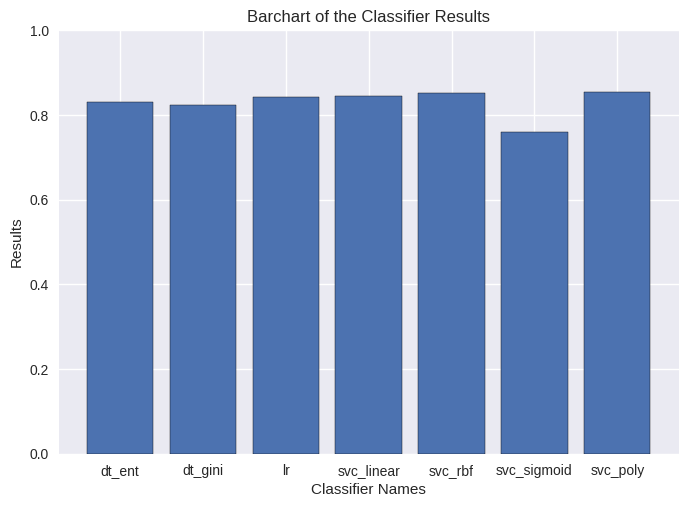

In [ ]:
plt.bar(names, results, edgecolor='black')
plt.xlabel('Classifier Names')
plt.ylabel('Results')
plt.title("Barchart of the Classifier Results")
plt.ylim([0, 1])
plt.show()

**Best 3 Models**
1. SVC(Kernel= Polynomial)
2. SVC(Kernel= SVC Radial Basis Function)
3. Logistic Regression

# Evaluation:
On the base models, k-fold cross validation have been implemented to perform the cross validtion score. For this dataset after sampling, cv is taken as 8(cv=8). In this validation, SVC Polynomial is the highest scorer with 84.5% followed by SVC Radial (84.5%) and Logistic Regression models (84.4%). are the second and third best models, respectively, and for the best models, SVC Polynomial achieved the best result with an 84.5% score. Their accuracy is 84.4% and 84.4% in that order.


# Implementation of Ensemble of Models

Now ensemble of models has been implemented on the best base model that is SVC Polynomial. Hence three different ensemble models have been defined. On stacking ensemble model, SVC Polynomial has been stacked with two other models: SVC-rbf kernel & LogisticRegression.

In [ ]:
# **************Designing a Stacking Ensemble of Models**************

def get_stacking():
    # **************Defining the Base Models: Level=0 Models**************
    level_0 = list()
    level_0.append(('svc_poly', SVC(kernel='poly')))  # Model-A
    level_0.append(('svc_rbf', SVC()))  # Model-B
    level_0.append(('lr', LogisticRegression(max_iter=10000)))  # Model-C

    # **************Defining the Meta Learner: Level=1**************
    level_1 = SVC(kernel='poly')

    # **************Designing the Stacking Ensemble of Models**************
    model_stacking = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=8)
    return model_stacking

# Defining get_ensemble_models() for Ensemble of Models

In [ ]:
def get_ensemble_models():
    model_ensemble = dict()
    svc_poly = SVC()
    model_ensemble['bagc'] = BaggingClassifier(estimator=svc_poly, n_estimators=50, max_samples=0.8, max_features=0.8)
    model_ensemble['boosting'] = AdaBoostClassifier(estimator=svc_poly, n_estimators=10, algorithm = 'SAMME')  # 10 steps
    model_ensemble['stack'] = get_stacking()
    return model_ensemble

# Performing cross validation on Ensembles of Models
Now futher cross validation has been applied on the ensemble models to evaluate the best model.

In [ ]:
# Evaluate models by cross validation score
results= list()
names= list()
def evaluate_model_by_cv(X_over, y_over):
    models = get_ensemble_models()
    score = dict()
    for name, model in models.items():
        scores = cross_val_score(model, X_over, y_over, scoring="recall_weighted", cv=8)
        score[name] = scores
        names.append(name)
    return score

score = evaluate_model_by_cv(X_over, y_over)
print('*********Cross Validation Score for each Ensemble of Model*********')
for item in score:
    print('>Model: %s, Mean Score: %.3f, Standard Deviation: %.3f' % (item, mean(score[item]), std(score[item])))
    results.append(mean(score[item]))

*********Cross Validation Score for each Ensemble of Model*********
>Model: bagc, Mean Score: 0.852, Standard Deviation: 0.050
>Model: boosting, Mean Score: 0.496, Standard Deviation: 0.000
>Model: stack, Mean Score: 0.832, Standard Deviation: 0.053


# Best Model Deployment

In [ ]:
best_model = BaggingClassifier(estimator=SVC(kernel='poly'), n_estimators=50, max_samples=0.8, max_features=0.8)
best_model.fit(X_over, y_over)

BaggingClassifier(estimator=SVC(kernel='poly'), max_features=0.8,
                  max_samples=0.8, n_estimators=50)

**Deployment:**

After performing cross validation on Ensemble models, it is observed that Bagging Ensemble of SVC Polynomial is the highest scorer with the score: 0.843 followed by Stacking: 0.817 and Boosting 0.496. Therefore, Bagging Ensemble of SVC Polynomial has been chosen as best model and hence, been deployed.

# Prediction
In the prediction phase, 11th row of the dataset has been taken as input and applied to the deployed trained model for prediction. It predicted the HeartDisease to be 1 that means the given patient has heart disease. After checking with the actual row, it is found that the prediction is accurate.

In [ ]:
input = X_over.iloc[[11]]
prediction = best_model.predict(input)
print('Prediction', prediction)
y.iloc[[11]]

Prediction [1]


11    1
Name: HeartDisease, dtype: int64